In [29]:
import pandas as pd

#Attempt to load the datasets again

corruption_df=pd.read_excel('corruption_perception_index.xlsx')
unicef_df=pd.read_excel('unicef_oct_2014.xlsx')

#Display the first few rows of each dataset to understand their structure
corruption_df_head=corruption_df.head()
unicef_df_head=unicef_df.head()
corruption_df_head,unicef_df_head

(     Unnamed: 0           Unnamed: 1 Unnamed: 2 Unnamed: 3 Unnamed: 4  \
 0  Country Rank  Country / Territory        NaN        NaN        NaN   
 1           NaN                  NaN    WB Code   IFS Code     Region   
 2             1              Denmark        DNK        128         EU   
 3             1          New Zealand        NZL        196         AP   
 4             3              Finland        FIN        172         EU   
 
      Unnamed: 5      Unnamed: 6    Unnamed: 7      Unnamed: 8  \
 0  Country Rank  CPI 2013 Score  Surveys Used  Standard Error   
 1           NaN             NaN           NaN             NaN   
 2             1              91             7             2.2   
 3             1              91             7             2.3   
 4             3              89             7             1.7   
 
                 Unnamed: 9  ... Unnamed: 16 Unnamed: 17 Unnamed: 18  \
 0  90% Confidence interval  ...         NaN         NaN         NaN   
 1          

In [22]:
#Extract and clean the relevant columns from the corruption score
corruption_cleaned=corruption_df.iloc[2:,[1,7]]
corruption_cleaned.columns=['Country','Corruption Score']
corruption_cleaned=corruption_cleaned.dropna().reset_index(drop=True)

#Extract and clean the relevant columns from the UNICEF dataset
unicef_cleaned=unicef_df.iloc[4:,[0,1]]
unicef_cleaned.columns=['Country','Child Labor Percentage']
unicef_cleaned=unicef_cleaned.dropna().reset_index(drop=True)

#Merge the datasets on the country columns
merged_df=pd.merge(corruption_cleaned,unicef_cleaned,on='Country')

#Convert the columns to appropriate types
merged_df['Corruption Score']=pd.to_numeric(merged_df['Corruption Score'],errors='coerce')
merged_df['Child Labor Percentage']=pd.to_numeric(merged_df['Child Labor Percentage'],errors='coerce')

#Drop rows with any NaN values
merged_df=merged_df.dropna().reset_index(drop=True)


In [23]:
print(merged_df)

        Country  Corruption Score  Child Labor Percentage
0       Uruguay                 6                     7.9
1         Chile                 9                     6.6
2   Saint Lucia                 3                     3.9
3      Botswana                 7                     9.0
4        Bhutan                 4                     2.9
..          ...               ...                     ...
89        Haiti                 5                    24.4
90        Yemen                 6                    22.7
91         Iraq                 4                     4.7
92  Afghanistan                 3                    10.3
93      Somalia                 4                    49.0

[94 rows x 3 columns]


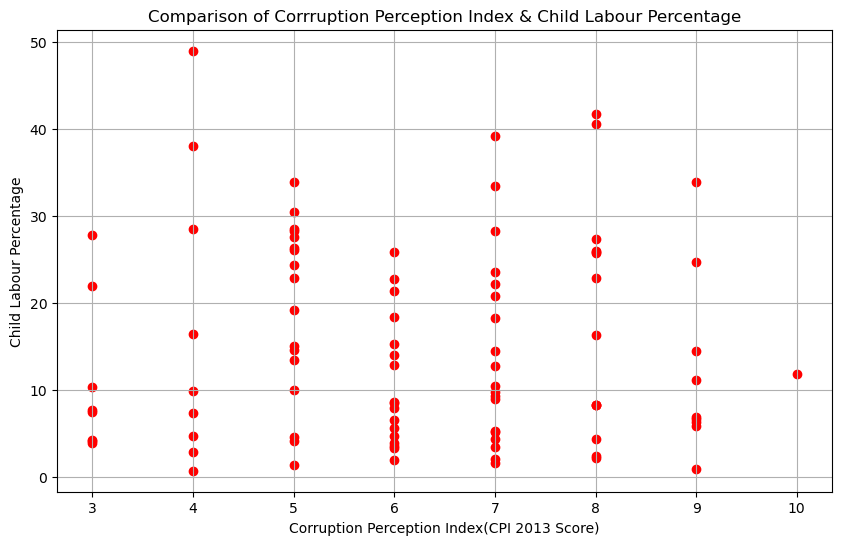

In [28]:
import matplotlib.pyplot as plt

#CReate the scatter plot
plt.figure(figsize=(10,6))
plt.scatter(merged_df['Corruption Score'],merged_df['Child Labor Percentage'],color='red')

#Add lables and title
plt.xlabel('Corruption Perception Index(CPI 2013 Score)')
plt.ylabel('Child Labour Percentage')
plt.title('Comparison of Corrruption Perception Index & Child Labour Percentage')
plt.grid(True)

#Show the plot
plt.show()